In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
seed = 180
pos_dir = '../data/pos'
neg_dir = '../data/neg'

In [4]:
# Importing Keras 
from keras.models import Sequential                          # Neural network model as a sequence of layers.
from keras.layers import Conv2D                              # Convolutional layer
from keras.layers import MaxPooling2D                        # Max pooling layer 
from keras.layers import Flatten                             # Layer used to flatten 2D arrays for fully-connected layers.
from keras.layers import Dense                               # This layer adds fully-connected layers to the neural network.
from keras.layers import Dropout                             # This serves to prevent overfitting by dropping out a random set of activations.
from keras.layers import BatchNormalization                  # This is used to normalize the activations of the neurons.
from keras.layers import Activation                          # Layer for activation functions
from keras.callbacks import EarlyStopping, ModelCheckpoint   # Classes used to save weights and stop training when improvements reach a limit
from keras.models import load_model                          # This helps us to load trained models
# Preprocessing layers
from keras.layers import Rescaling                           # This layer rescales pixel values

# Importing TensorFlow
import tensorflow as tf

First thing we are going to do is create a pipe for test data:

In [5]:
# Creating a Dataset for the Training data
test = tf.keras.utils.image_dataset_from_directory(
    "../data2/test",  # Directory where the Training images are located
    labels = 'inferred', # Classes will be inferred according to the structure of the directory
    label_mode = 'categorical',
    class_names = ['pos', 'neg'], #extensions of the folders holding the classes
    batch_size = 16,    # Number of processed samples before updating the model's weights
    image_size = (400, 400), # Defining a fixed dimension for all images
    shuffle = True,  # Shuffling data
    seed = seed,  # Random seed for shuffling and transformations
    validation_split = 0, # We don't need to create a validation set from the training set
    crop_to_aspect_ratio = True # Resize images without aspect ratio distortion
)

Found 3629 files belonging to 2 classes.


In [6]:
scaler = Rescaling(1./255) # Defining scaler values between 0 to 1
test = test.map(lambda x, y: (scaler(x), y)) # Rescaling datasets

In [7]:
# Checking minimum and maximum pixel values in the training dataset
min_value = float('inf')
max_value = -float('inf')

for img, label in test:
    batch_min = tf.reduce_min(img)
    batch_max = tf.reduce_max(img)
    
    min_value = min(min_value, batch_min.numpy())
    max_value = max(max_value, batch_max.numpy())
    
print('\nMinimum pixel value in the Validation dataset', min_value)
print('\nMaximum pixel value in the Validation dataset', max_value)


Minimum pixel value in the Validation dataset 0.0

Maximum pixel value in the Validation dataset 1.0


In [9]:
model = tf.keras.models.load_model('safety_gear_detect_V3.keras')

# Show the model architecture
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 400, 400, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 400, 400, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 400, 400, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 400, 400, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 200, 200, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 200, 200, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 200, 200, 64)   │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 200, 200, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 200, 200, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 100, 100, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 100, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 100, 100, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 100, 100, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 100, 100, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 50, 50, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 50, 50, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 50, 50, 256)    │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 50, 50, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 50, 50, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 25, 25, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 25, 25, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 25, 25, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 25, 25, 512)    │             

 Total params: 358,688,198 (1.34 GB)

 Trainable params: 179,343,106 (684.14 MB)

 Non-trainable params: 1,984 (7.75 KB)

 Optimizer params: 179,343,108 (684.14 MB)

In [40]:
preds = model.predict(test)  # Running model on the test dataset
val_loss, val_acc = model.evaluate(test) # Obtaining Loss and Accuracy on the val dataset

print('\nValidation Loss: ', val_loss)
print('\nValidation Accuracy: ', np.round(val_acc * 100), '%')

227/227 ━━━━━━━━━━━━━━━━━━━━ 397s 2s/step
227/227 ━━━━━━━━━━━━━━━━━━━━ 487s 2s/step - accuracy: 0.7613 - loss: 3.1369

Validation Loss:  3.339996099472046

Validation Accuracy:  75.0 %


In [42]:
preds[0]

array([0.00260498, 0.9998045 ], dtype=float32)

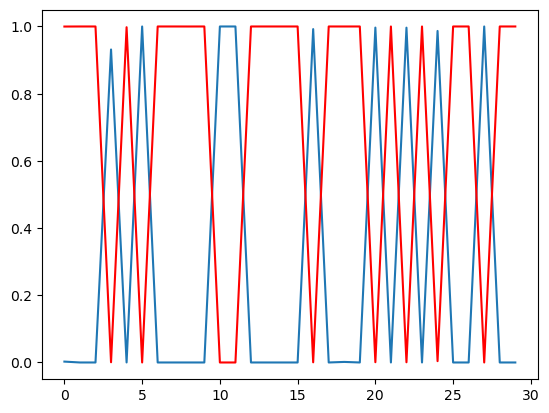

In [80]:
plt.plot(preds[:30,0])
plt.plot(preds[:30,1], color='r')

In [65]:
from PIL import Image
def pred_image(im_name):
    # Loading the image
    image_path = '../data2/test/' + im_name
    original_image = Image.open(image_path)
    og_width, og_height = original_image.size

    # Resizing image for optimal performance
    new_width = int(og_width * .20) # 20% of the original size
    new_height = int(og_height * .20) # 20% of the original size

    resized_img = original_image.resize((new_width, new_height))
    print('Picture of safety gear: \n')
    plt.imshow(resized_img)
    # Manually preprocessing image
    preprocessed_image = original_image.resize((400, 400))
    preprocessed_image = np.array(preprocessed_image) / 255.0

    predic = model.predict(np.expand_dims(preprocessed_image, axis = 0))
    labels = ['pos', 'neg']

    preds_class = np.argmax(predic)
    preds_label = labels[preds_class]

    print(f'\nPredicted Class: {preds_label}')
    print(f'\nConfidence Score: {preds[0][preds_class]}')

Picture of safety gear: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step

Predicted Class: pos

Confidence Score: 0.0026049765292555094


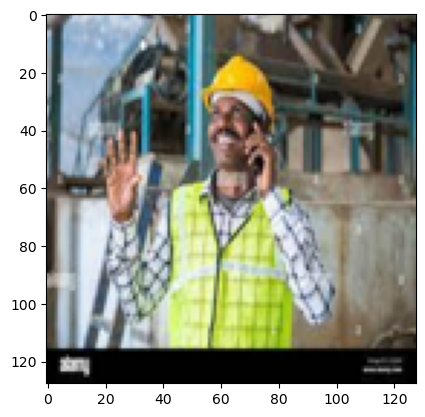

In [63]:
pred_image('pos/helmet_jacket_07350.jpg')

Picture of safety gear: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step

Predicted Class: neg

Confidence Score: 0.9998044967651367


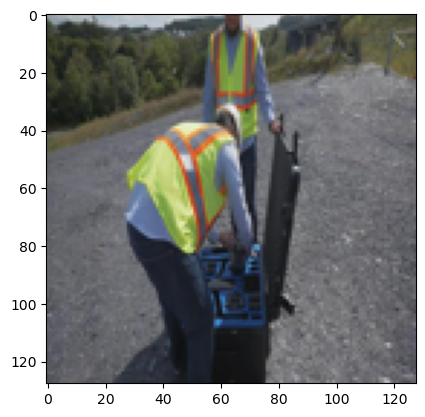

In [66]:
pred_image('pos/helmet_jacket_07353.jpg')

Picture of safety gear: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step

Predicted Class: pos

Confidence Score: 0.0026049765292555094


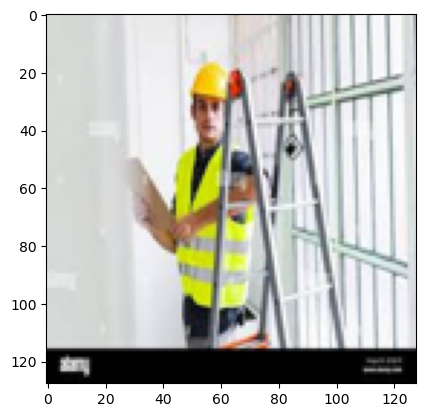

In [81]:
pred_image('pos/helmet_jacket_07355.jpg')

Picture of safety gear: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step

Predicted Class: pos

Confidence Score: 0.0026049765292555094


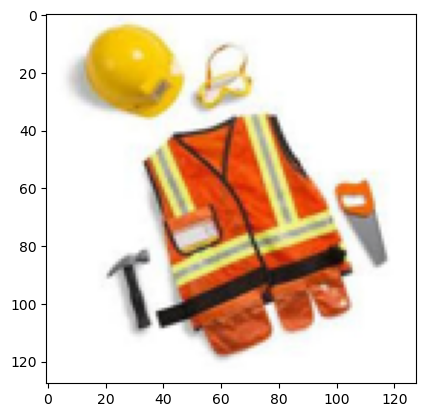

In [83]:
pred_image('pos/helmet_jacket_07360.jpg')

Picture of safety gear: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step

Predicted Class: neg

Confidence Score: 0.9998044967651367


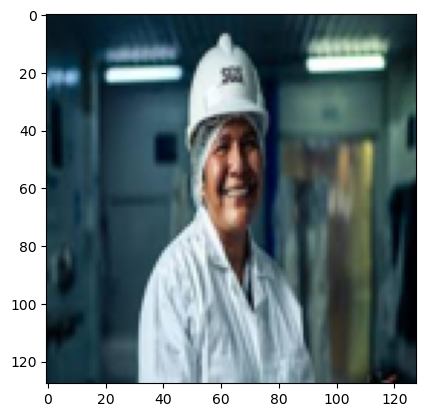

In [82]:
pred_image('pos/helmet_jacket_07361.jpg')